# Gradient Boosting (GBM)

## Пункт 1

Идея: каждая следующая модель корректирует ошибки предыдущих (причём обучение последовательное, а не параллельное как в бэггинге)

**Бустинг для MSE**



$a_n(x) = Σ_{n=1}^N \gamma_n b_n(x) = Σ_{n=1}^N b_n(x)$, где $\gamma_n$ - некоторые веса, на которые можно забить, потому что сейчас особо не используются

$L(y, a) = (y-a)^2$

тогда первая базовая модель учится как обычно:

$b_1(x) = \underset {b}{argmin} \frac{1}{l} Σ_{i=1}^l (b(x_i) - y_i)^2$ (на всей выборке)

посчитаем, насколько наша первая модель ошибается на всех объектах:

$S_i^{(1)} = y_i - a_1(x_i)$ - сдвиг (насколько отклоняется от правильного ответа на каждом объекте)

тогда вторую модель обучим следующим образом:

$b_2(x) = \underset {b}{argmin} \frac{1}{l} Σ_{i=1}^l (b(x_i) - S_i^{(1)})^2$

Если вторая базовая модель идеально приблихит сдвиги, то:

$a_2(x_i) = b_1(x_i) + b_2(x_i) = b_1(x_i) + S_i^{(1)} = b_1(x_i) + y_i - a_1(x_i) = y_i$ - такой идеальный случай маловероятен, поэтому мы будем считать следующие сдвиги:

$S_i^{(2)} = y_i - a_2(x_i)$ и т. д. 

то есть каждую следующую модель мы обучаем на сдвигах предыдущих

Это мы рассмотрели частный случай для MSE, перейдем к общему

**Общий случай**

Пусть у нас есть произвольная функция потерь 

$L(y, z)$ - дифференцируемая

Построим первую базовую модель:

$b_1(x)$ - простая модель/обучена на всей выборке/$b_1(x) = ȳ$

пусть мы уже обучили $a_{N-1}(x)$, посмотрим к обучать N-ую:

$\frac{1}{l} Σ_{i=1}^l L(y_i, a_{N-1}(x_i) + b_N(x_i)) → \underset{b_N}{min}$, то есть найти такую модель $b_N$, которая будет оптимальной добавкой к $a_{N-1}(x_i)$

Если $L(y, a+b) = L(y-a, b)$ (то есть дообучить базовую модель на новую целевую переменную), то:

$\frac{1}{l} Σ_{i=1}^l L(y_i - a_{N-1}(x_i), b_N(x_i)) → \underset{b_N}{min}$

Но далеко не все функции потерь такие, например в классификации (LogLoss, HingeLoss), этому свойству не удовлетворяют

Следовательно нам нужен другой универсальный подход

При каких $b_N(x)$ наша функция потерь уменьшаться будет сильнее всего?

У нас есть $L(y_i, a_{N-1}(x_i))$, как нужно менять второй аргумент (в + или в -) чтобы функция потерь уменьшилась?

Для этого нужен градиент:

$a_{N-1}(x_i)$ нужно сдвинуть в сторону: $-\frac{\partial L}{∂z} |_{z = a_{N-1}(x_i)}$

тогда:

$S_i^{(N)} = -\frac{\partial }{∂z} L(y, z) |_{z = a_{N-1}(x_i)}$

Поэтому очередную базовую модель мы обучать следующим образом:

$\frac{1}{l} Σ_{i=1}^l (b_N(x_i) - S_i^{(N)})^2 → min$ - обучение базовой модели в градиентном бустинге

Почему обучаем на квадрат ошибки?

Наша целевая переменная имеет изначально какую-то единицу измерения: рубли, штуки, метры. Когда мы берём производные, то эти единицы измерения уже не те, теряется смысл оценивания ошибки.

Также есть отдаленный смысл, что данный функционал требует что вектор свдигов и прогнозов был как можно более сонаправленный:

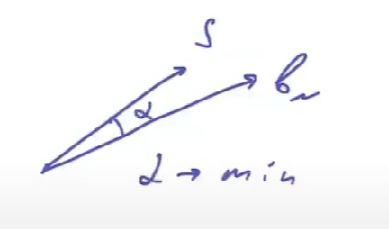

На каждом шаге считаем градиент и смотрим, куда свдинуть прогнозы композиции, апроксимируем это направление моделью и двигаемся далее в этом направлении. 

Простыми словами градиентный бустинг - градиентный спусук в пространстве прогнозов композиции на обучающей выборке

## Пункт 2

**Подходы**

**Регуляризация бустинга**

1. Сокращение шага

Базовые модели простые -> неточные, нельзя им сильно доверять

Базовые модели мощные -> быстро дадут ошибку 0, не сможем строить композицию

Как это решить:

$a_n(x) = a_{n-1}(x) + η b_n(x)$, где $0 < η ≤ 1$  - длина шага


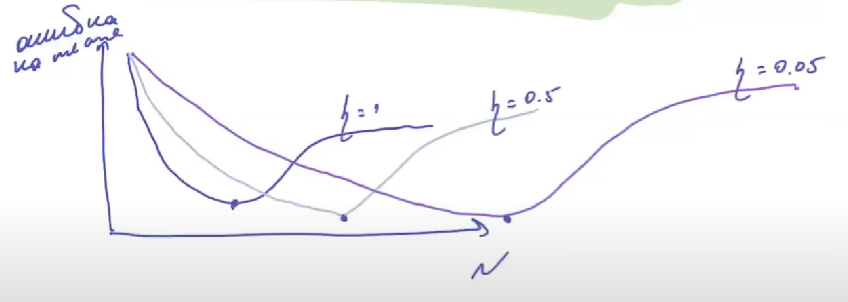

1. При уменьшении шага надо увеличивать размер композиции

2. В отличие от бэггинга бустинг переобучается с ростом N

3. В бустинге N подбираем на валидационной выборке

2. Стохастический градиентный бустинг

$b_n(x)$ обучается на $X_n \in X$

**Функции потерь**

1. Регрессия 

Чаще всего берётся квадратичная функция потерь, можно взять модуль отклоения, LogCosh или HuberLoss

2. Классификация

$b_n(x)$ - уверенность модели в том, что x - положительный (относится к классу +1), вещественное число

$a_n(x) = Σb_n(x)$

Тогда можно использовать LogLoss:

$L(y, z) = log(1+e^{-yz})$, тогда $S_i = \frac{y_i}{1+exp(y_i a_n(x_i))}$

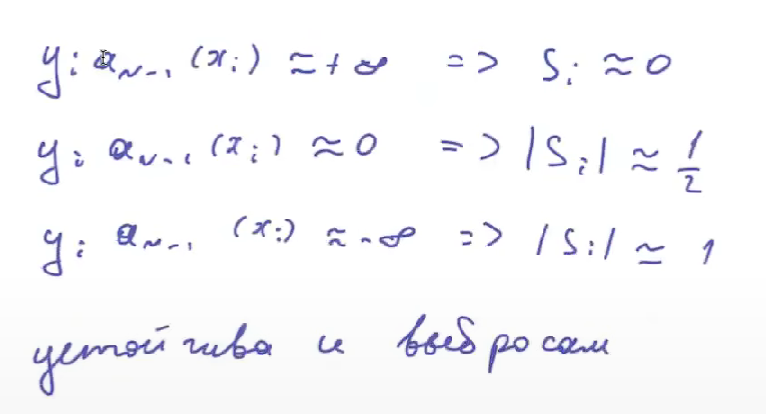


или HingeLoss:

$L(y, z) = max(0, 1 - yz)$

3. Деревья

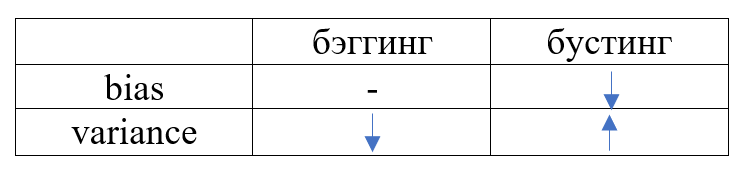

=> нужны базовые модели с высоким сдвигом и низким разбросом

Неплохой вариант: неглубокие деревья

$b_n(x) = Σ_{j=1}^{J_N} b_{nj} [x \in R_{nj}]$, где j - индексы листьев, R - области разбиения, b - значения в листьях.

Тогда на N-й итерации:

$a_N(x) = a_{N-1}(x) + \eta Σ_{j=1}^{J_N} b_{nj} [x \in R_{nj}] $

Что если переподобрать значения в листьях через функцию потерь?

$Σ_{i=1}^l (L(y_i, a_{N-1}(x) + Σ_{j=1}^{J_N} \eta b_{nj} [x \in R_{nj}]) → min$

$Σ_{i=1}^l Σ_{(x_i, y_i) \in R_{nj}} L(y_i, a_{N-1}(x) + b_{nj}) → min$

Получается одномерная задача оптимизации - подобрать прогноз в листье так, чтобы он был оптимален с точки зрения исходной функции потерь L



Типичный подход: сделать один шаг метода оптимизации по $b_{nj}$

**Взвешешивание объектов**

Многие функционалы в задачах классификации выражаются через отсупы объектов:

$L(y, z) = L(yz)$

$S_i = y_i (-\frac{∂L(y_iz)}{dz}|_{z = a_{n-1}(x)})$ - второе слагаемое - w

Получается, что в задаче классификации мы учим каждую базовую модель на исходные целевые переменные с некоторым весами, которые зависят от поведения функции потерь в этой точке 

## Пункт 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [2]:
!wget -O 'train.csv' -q 'https://www.dropbox.com/s/tcvwgixnh9ixecd/car_price_pred.csv?dl=0'

In [3]:
train = pd.read_csv('train.csv')
train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
train.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [5]:
train.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
y = train['price']
X = train.drop(columns=['price'])

In [7]:
numeric_data = X.select_dtypes([np.number])
numeric_features = numeric_data.columns

categ_data = X.select_dtypes([np.object0])
cat_features = categ_data.columns

In [8]:
mean_encode = train.groupby('CarName')['price'].mean()
train.loc[:, 'CarName_mean_enc'] = train['CarName'].map(mean_encode)

mean_encode = train.groupby('fueltype')['price'].mean()
train.loc[:, 'fueltype_mean_enc'] = train['fueltype'].map(mean_encode)

mean_encode = train.groupby('aspiration')['price'].mean()
train.loc[:, 'aspiration_mean_enc'] = train['aspiration'].map(mean_encode)

mean_encode = train.groupby('doornumber')['price'].mean()
train.loc[:, 'doornumber_mean_enc'] = train['doornumber'].map(mean_encode)

mean_encode = train.groupby('carbody')['price'].mean()
train.loc[:, 'carbody_mean_enc'] = train['carbody'].map(mean_encode)

mean_encode = train.groupby('drivewheel')['price'].mean()
train.loc[:, 'drivewheel_mean_enc'] = train['drivewheel'].map(mean_encode)

mean_encode = train.groupby('enginelocation')['price'].mean()
train.loc[:, 'enginelocation_mean_enc'] = train['enginelocation'].map(mean_encode)

mean_encode = train.groupby('enginetype')['price'].mean()
train.loc[:, 'enginetype_mean_enc'] = train['enginetype'].map(mean_encode)

mean_encode = train.groupby('cylindernumber')['price'].mean()
train.loc[:, 'cylindernumber_mean_enc'] = train['cylindernumber'].map(mean_encode)

mean_encode = train.groupby('fuelsystem')['price'].mean()
train.loc[:, 'fuelsystem_mean_enc'] = train['fuelsystem'].map(mean_encode)

In [9]:
y = train['price']
X = train.drop(columns=['price'])

In [10]:
X = X.drop(columns = cat_features)

<ipython-input-11-0f415a98584e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='price', ylabel='Density'>

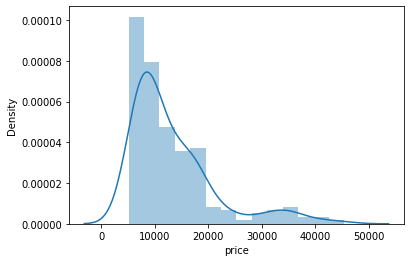

In [11]:
sns.distplot(y)

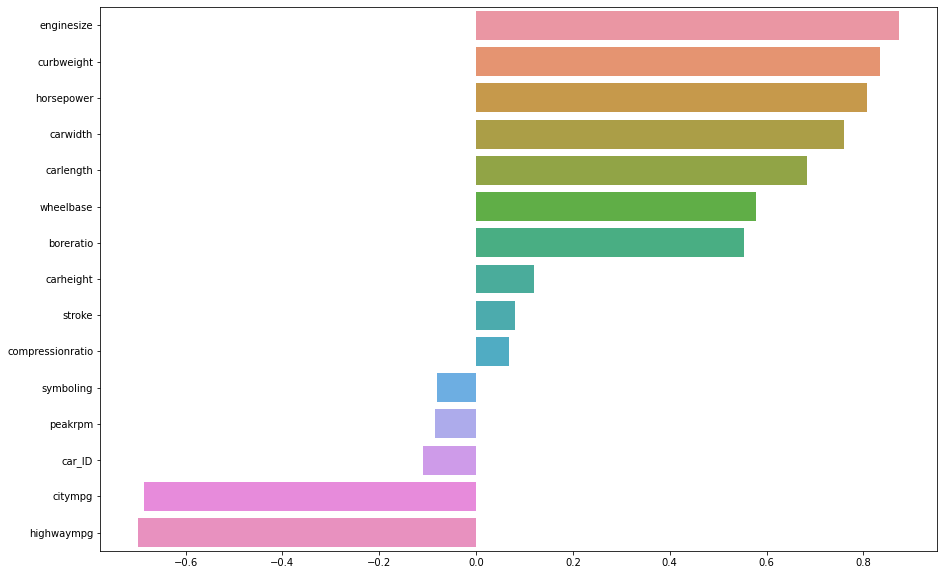

In [12]:
correlations = X[numeric_features].corrwith(y).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

In [13]:
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder

scal = StandardScaler()
scaled_X = scal.fit_transform(X)

In [14]:
X = pd.DataFrame(scaled_X, index=X.index, columns=X.columns)

In [15]:
X.sample(5)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,CarName_mean_enc,fueltype_mean_enc,aspiration_mean_enc,doornumber_mean_enc,carbody_mean_enc,drivewheel_mean_enc,enginelocation_mean_enc,enginetype_mean_enc,cylindernumber_mean_enc,fuelsystem_mean_enc
112,0.168983,-0.671472,1.522109,1.027916,1.164596,1.220535,1.340821,0.604046,1.370348,0.845777,...,0.545507,3.041381,2.130854,0.884652,0.360074,1.299340,-0.121867,0.360362,-0.470742,0.537748
44,-0.980099,0.133509,-0.708596,-1.474692,-1.078431,-0.707626,-1.312196,-0.888455,-1.109459,-0.464834,...,-0.423029,-0.328798,-0.469295,-1.130388,0.360074,-0.790757,-0.121867,-0.454206,-0.470742,-1.217348
113,0.185881,-0.671472,2.570873,2.019209,1.164596,1.220535,1.404355,-0.166277,0.482059,-3.405717,...,0.277245,-0.328798,-0.469295,0.884652,-0.305161,1.299340,-0.121867,0.360362,-0.470742,0.940087
98,-0.067593,0.938490,-0.608714,-0.946544,-0.984972,-0.174305,-1.054210,-0.719947,-0.665314,0.110556,...,0.006072,-0.328798,-0.469295,-1.130388,3.012579,-0.790757,-0.121867,-0.454206,-0.470742,-1.217348
36,-1.115285,-0.671472,-0.375655,-1.377188,-0.938242,1.876931,-1.023406,-0.840310,-1.516591,0.494149,...,-0.768089,-0.328798,-0.469295,0.884652,-0.305161,-0.790757,-0.121867,-0.454206,-0.470742,-1.201099


In [16]:
X.dtypes

car_ID                     float64
symboling                  float64
wheelbase                  float64
carlength                  float64
carwidth                   float64
carheight                  float64
curbweight                 float64
enginesize                 float64
boreratio                  float64
stroke                     float64
compressionratio           float64
horsepower                 float64
peakrpm                    float64
citympg                    float64
highwaympg                 float64
CarName_mean_enc           float64
fueltype_mean_enc          float64
aspiration_mean_enc        float64
doornumber_mean_enc        float64
carbody_mean_enc           float64
drivewheel_mean_enc        float64
enginelocation_mean_enc    float64
enginetype_mean_enc        float64
cylindernumber_mean_enc    float64
fuelsystem_mean_enc        float64
dtype: object

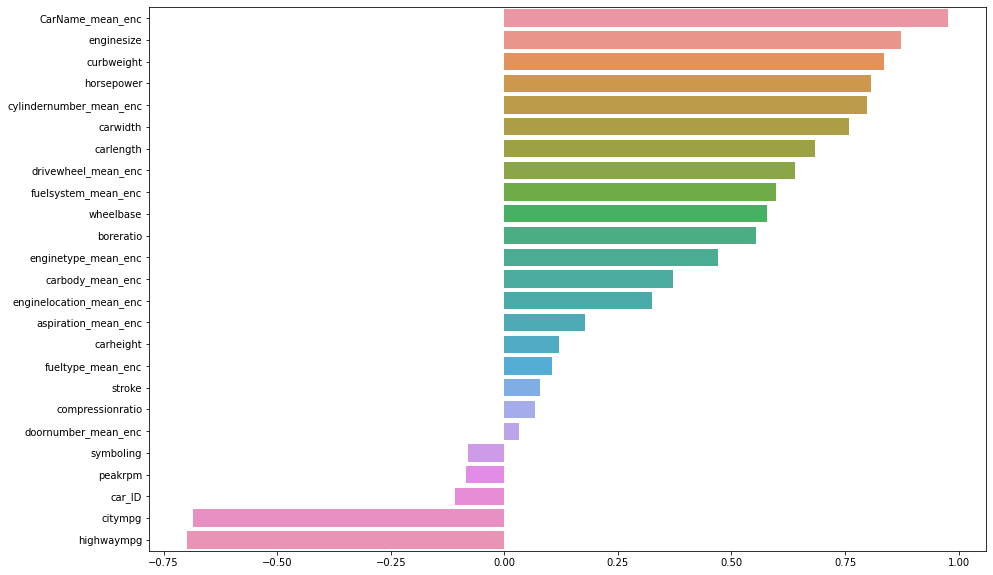

In [17]:
correlations = X.corrwith(y).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

## Пункт 4

In [18]:
class GradientBoosting:
    
    def __init__(self, max_depth=10, min_samples_split=5, min_samples_leaf=5, max_features=3, lr=0.01, num_iter=500):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.lr = lr
        self.num_iter = num_iter
        self.y_mean = 0
        
    def __calculate_loss(self,y, y_pred):
        loss = (1/len(y)) * 0.5 * np.sum(np.square(y-y_pred))
        return loss
    
    def __take_gradient(self, y, y_pred):
        grad = -(y-y_pred)
        return grad
    
    def __create_base_model(self, X, y):
        base = DecisionTreeRegressor(criterion='squared_error',max_depth=self.max_depth,
                                    min_samples_split=self.min_samples_split,
                                    min_samples_leaf=self.min_samples_leaf,
                                    max_features=self.max_features)
        base.fit(X,y)
        return base
    
    def predict(self,models, y, X):
        pred_0 = np.array([self.y_mean] * len(X))
        pred = pred_0.reshape(len(pred_0),1)
        
        for i in range(len(models)):
            temp = (models[i].predict(X)).reshape(len(X),1)
            pred -= self.lr * temp
        
        return pred
    
    def train(self, X, y):
        models = []
        losses = []
        self.y_mean = np.mean(y)
        pred_0 = np.array([np.mean(y)] * len(y))
        pred = pred_0.reshape(len(pred_0),1)
        
        for epoch in range(self.num_iter):
            loss = self.__calculate_loss(y, pred)
            losses.append(loss)
            grads = self.__take_gradient(y, pred)
            base = self.__create_base_model(X, grads)
            r = (base.predict(X)).reshape(len(X),1)
            pred -= self.lr * r
            models.append(base)
            
        return models, losses, pred_0

## Пункт 5

### My Gradient Boosting

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

y_train = np.array(y_train).reshape(X_train.shape[0],1)
y_test = np.array(y_test).reshape(X_test.shape[0],1)

In [22]:
gbm = GradientBoosting()

models, losses, preds = gbm.train(X_train,y_train)

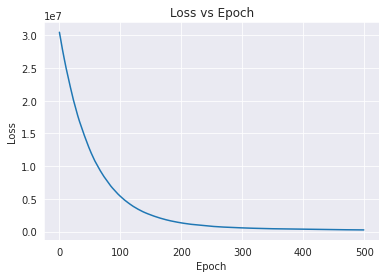

In [23]:
sns.set_style('darkgrid')
ax = sns.lineplot(x=range(500),y=losses)
ax.set(xlabel='Epoch',ylabel='Loss',title='Loss vs Epoch')
None

In [24]:
y_train_pred = gbm.predict(models, y_train, X_train)
y_test_pred = gbm.predict(models, y_train, X_test)

print('MSE:', mean_squared_error(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))

print('R2:', r2_score(y_train, y_train_pred))
print('R2:', r2_score(y_test, y_test_pred))

MSE: 497687.3506713025
MSE: 4274633.204353128
R2: 0.9918344466498176
R2: 0.9383030736504672


### Sklearn Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, criterion='squared_error',
                                    max_depth=15,min_samples_split=5,
                                    min_samples_leaf=5,max_features=10)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print('MSE:', mean_squared_error(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))

print('R2:', r2_score(y_train, y_train_pred))
print('R2:', r2_score(y_test, y_test_pred))

MSE: 97946.66024340624
MSE: 3624315.181989838
R2: 0.9983929897382143
R2: 0.9476892879082571


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Пункт 6

### Catboost vs XGBoost vs LightGBM

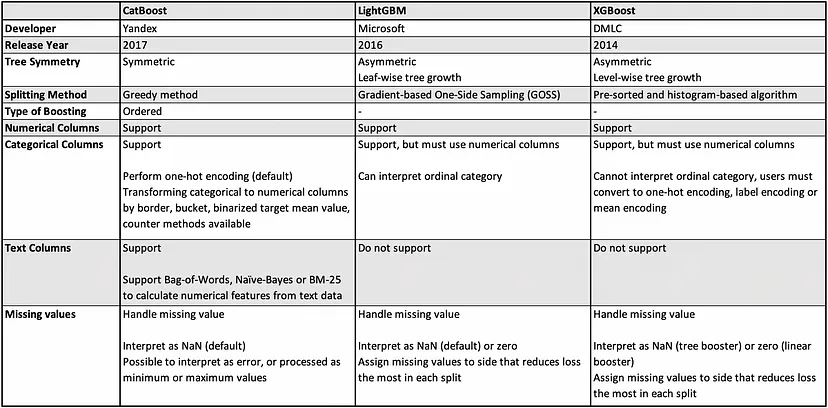

**Структурные различия**



1.   Категориальные переменные

В отличие от CatBoost или LGBM, XGBoost не может обрабатывать категориальные функции сам по себе, он принимает только числовые значения, подобные случайному лесу. Поэтому перед подачей категориальных данных в XGBoost необходимо выполнить различные кодировки. CatBoost обладает гибкостью, позволяя задавать индексы категориальных столбцов с использованием one_hot_max_size. Если ничего не передать в аргументе cat_features, CatBoost будет обрабатывать все столбцы как числовые переменные.



2. Построение дерева

В CatBoost симметричные деревья или сбалансированные деревья относятся к условию разделения, согласованному для всех узлов на одной и той же глубине дерева. LightGBM и XGBoost, с другой стороны, приводят к асимметричным деревьям, что означает, что условия разделения для каждого узла на одной и той же глубине могут различаться.

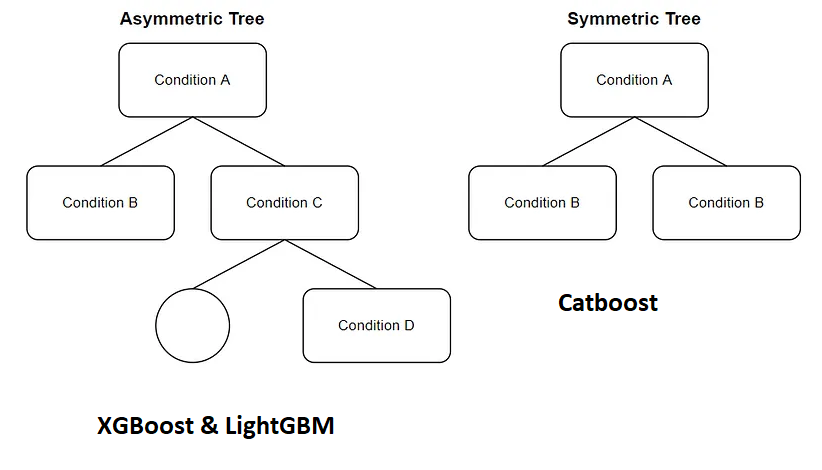

Для симметричных деревьев это означает, что условие разделения должно приводить к наименьшим потерям во всех узлах одинаковой глубины. Преимущества сбалансированной древовидной архитектуры включают более быстрое вычисление и оценку, а также переоснащение управления.

Несмотря на то, что LightGBM и XGBoost являются асимметричными деревьями, LightGBM растет по листам, а XGBoost — по уровням. Проще говоря, мы можем думать о LightGBM как о выборочном выращивании дерева, что приводит к меньшим и более быстрым моделям по сравнению с XGBoost.

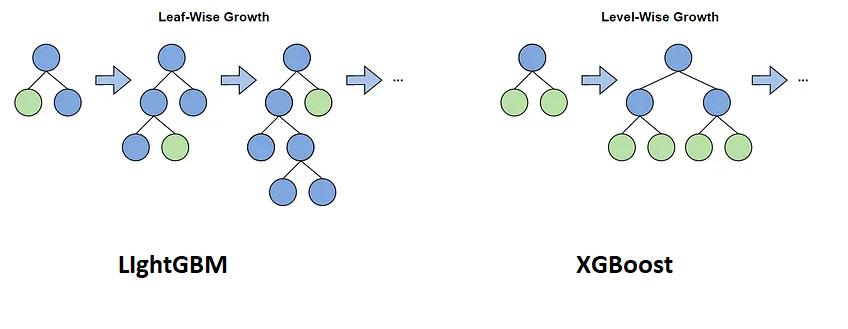

3. Метод сплита

В **CatBoost** используется жадный метод.

В **LightGBM** Gradient-based One-Side Sampling (GOSS) сохраняет все экземпляры данных с большими градиентами и выполняет случайную выборку для экземпляров данных с малыми градиентами. Точки данных с большими градиентами имеют более высокие ошибки и будут важны для нахождения оптимального разделения, в то время как точки данных с меньшими градиентами имеют меньшие ошибки и будут важны для сохранения точности изученных деревьев решений. Этот метод выборки приводит к меньшему количеству экземпляров данных для обучения модели и, следовательно, к более быстрому обучению.

В **XGBoost** алгоритм предварительной сортировки рассматривает все признаки и сортирует их по значению. После этого выполняется линейное сканирование, чтобы определить наилучшее разделение для признака, которое приводит к наибольшему увеличению критерия информативности. Алгоритм на основе гистограммы работает таким же образом, но вместо того, чтобы рассматривать все значения признаков, он группирует значения признаков в дискретные ячейки и вместо этого находит точку разделения на основе дискретных ячеек, что более эффективно, чем алгоритм с предварительной сортировкой, но все же медленнее, чем ГОСС.

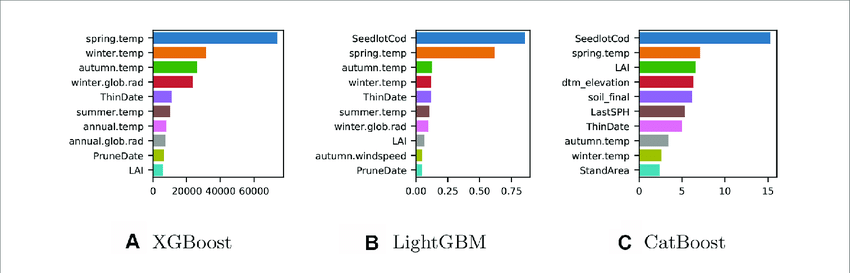

4. Повышение точности, скорости и контроль переобучения

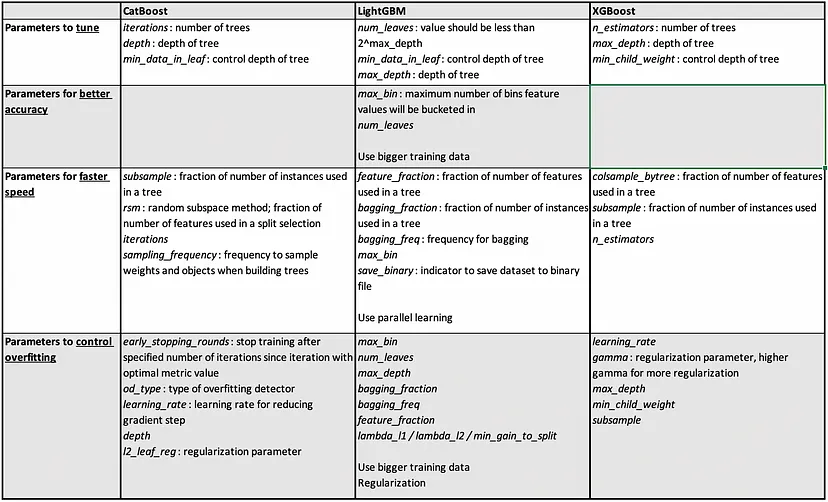

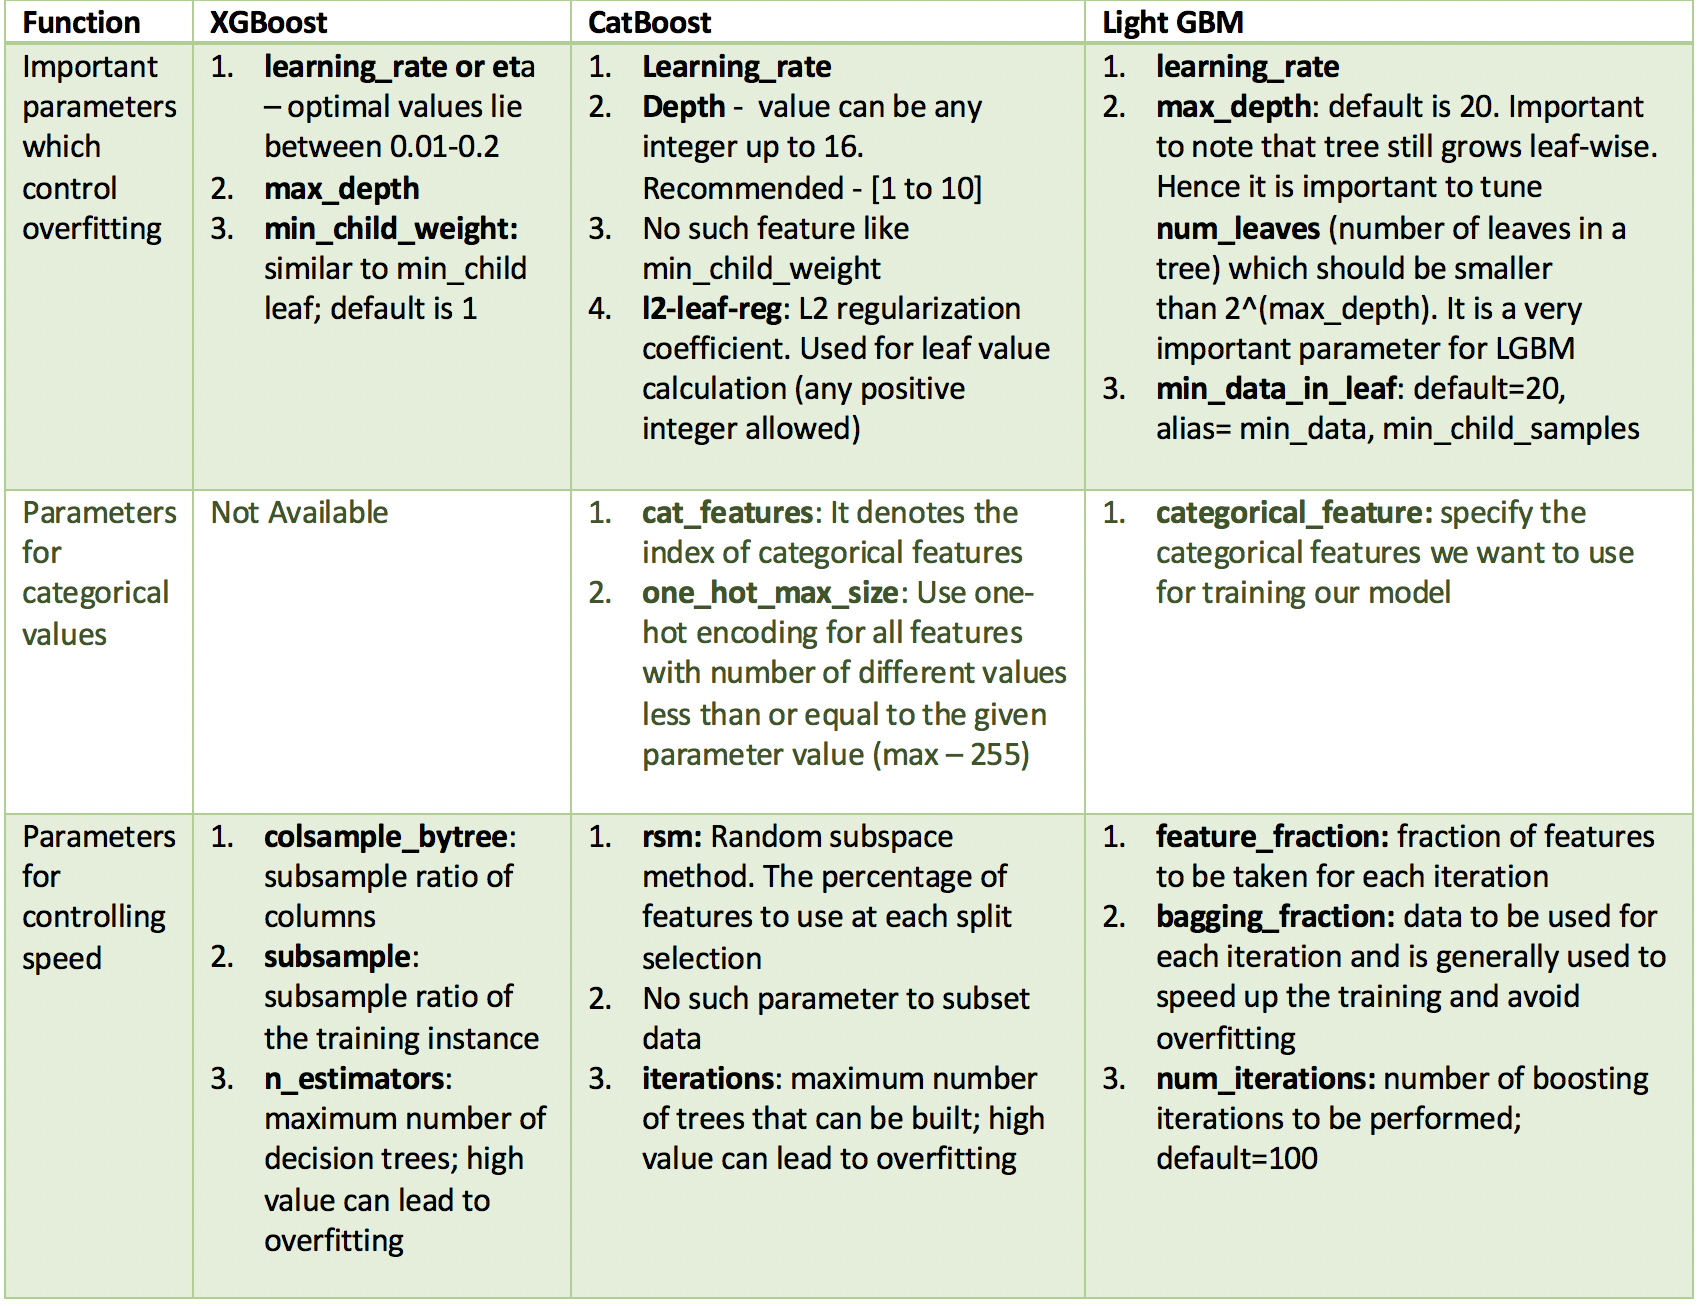

In [27]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 4.4 MB/s eta 0:00:00


In [28]:
import xgboost as xgb
import lightgbm as lgbm
import catboost as cb

### Catboost

In [29]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [30]:
model1 = cb.CatBoostRegressor()
model2 = xgb.XGBRegressor()
model3 = lgbm.LGBMRegressor()

In [31]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model1.grid_search(grid, train_dataset)

Выходные данные были обрезаны до нескольких последних строк (5000).
156:	learn: 1055.5387052	test: 2307.6387431	best: 2307.6387431 (156)	total: 245ms	remaining: 67.2ms
157:	learn: 1047.6049584	test: 2300.5625994	best: 2300.5625994 (157)	total: 247ms	remaining: 65.7ms
158:	learn: 1038.8852405	test: 2300.2451192	best: 2300.2451192 (158)	total: 249ms	remaining: 64.2ms
159:	learn: 1029.3752913	test: 2294.6273018	best: 2294.6273018 (159)	total: 251ms	remaining: 62.6ms
160:	learn: 1021.7311914	test: 2283.5404215	best: 2283.5404215 (160)	total: 252ms	remaining: 61.1ms
161:	learn: 1015.6633441	test: 2277.9127412	best: 2277.9127412 (161)	total: 254ms	remaining: 59.6ms
162:	learn: 1008.3200678	test: 2272.4303791	best: 2272.4303791 (162)	total: 256ms	remaining: 58ms
163:	learn: 999.1586664	test: 2262.7659011	best: 2262.7659011 (163)	total: 257ms	remaining: 56.5ms
164:	learn: 990.1206201	test: 2256.2513375	best: 2256.2513375 (164)	total: 259ms	remaining: 54.9ms
165:	learn: 982.2985662	test: 2246.9

{'params': {'depth': 2,
  'l2_leaf_reg': 1,
  'iterations': 200,
  'learning_rate': 0.03},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45

In [32]:
pred = model1.predict(X_test)
mse = (mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
print('MSE: {:.2f}'.format(mse))
print('R2: {:.2f}'.format(r2))

MSE: 4692987.06
R2: 0.93


In [33]:
from sklearn.inspection import permutation_importance

Text(0.5, 0, 'CatBoost Feature Importance')

<Figure size 432x288 with 0 Axes>

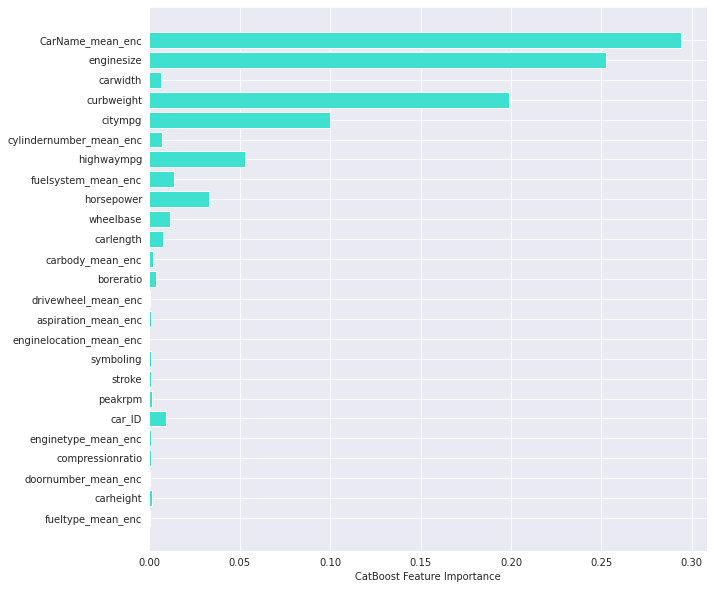

In [34]:
sorted_feature_importance = model1.feature_importances_.argsort()
plt.figure()
plt.figure(figsize = (10, 10))
plt.barh(X.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

### XGBoost

In [35]:
model2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [36]:
y_pred = model2.predict(X_test)

In [37]:
mse = (mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
print('MSE: {:.2f}'.format(mse))
print('R2: {:.2f}'.format(r2))

MSE: 4692987.06
R2: 0.93


### LightGBM

In [38]:
model3.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor()

In [39]:
y_pred = model3.predict(X_test)

In [40]:
mse = (mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
print('MSE: {:.2f}'.format(mse))
print('R2: {:.2f}'.format(r2))

MSE: 4692987.06
R2: 0.93
